**Azure Threat Hunting**

by Maarten Goet, MVP & RD

Install the Kqlmagic extension

In [ ]:
#!pip install Kqlmagic --no-cache-dir --upgrade

Load the Kqlmagic extension


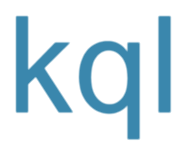

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
%reload_ext Kqlmagic

Connect to our Log Analytics backend (in this case: Azure Security Center)

In [2]:
%kql loganalytics://tenant='...';clientsecret='...';workspace='...';alias='...'

<IPython.core.display.Javascript object>

Query ASC for any network connections this VM has

In [ ]:
#%kql VMConnection | where Computer == ‘APPSERVER’

Filter the query so that we only see connections to IP's outside of The Netherlands

In [12]:
%%kql 
    VMConnection
    | where Computer == 'APPSERVER'
    | where Direction == 'outbound'
    | where RemoteCountry != 'Netherlands'

Put the results into a dataframe

In [ ]:
df = _.to_dataframe()

Load the Pandas extensions, then import a list of TOR nodes (IP addresses) from this URL

In [ ]:
import pandas as pd
torlist = pd.read.csv(‘https://www.dan.me.uk/torlist’,header=0,names=[‘DestinationIp’])

Compare the KQL output to the TOR list and see if we have any match

In [ ]:
df.merge(torlist, on=‘DestinationIp’)